In [93]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Dataset of 10 classes
<img src="./img/cifar10.png" style = "width:500px; height=500px;">

In [94]:
x_train.shape

(50000, 32, 32, 3)

- 50000 images in dataset  
- each 32x32 size  
- each rgb

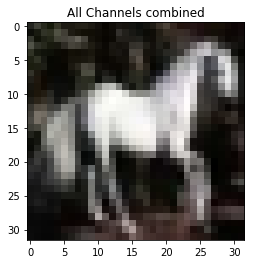

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt

image = x_test[13]

plt.imshow(image)
plt.title("All Channels combined")

In [96]:
def get_chanels(img):
    red = img[:, :, 0]
    green = img[:, :, 1]
    blue = img[:, :, 2]
    return red, green, blue

In [97]:
def show_chanels(img):
    
    img_red, img_green, img_blue = get_chanels(image)
    
    plt.figure(figsize=(5, 5))
    plt.subplots()
    plt.imshow(img_red, cmap='Reds')
    plt.title("Red channel")

    plt.subplots()
    plt.imshow(img_green, cmap='Greens')
    plt.title("Green channel")

    plt.subplots()
    plt.imshow(img_blue, cmap='Blues')
    plt.title("Blue channel")

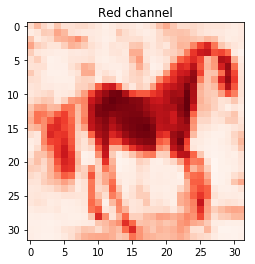

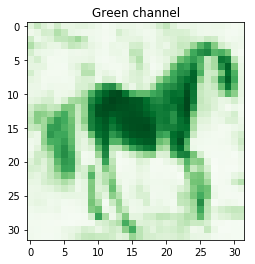

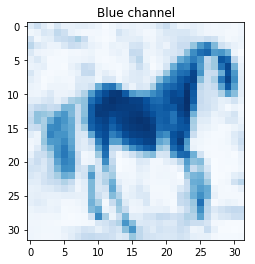

In [98]:
show_chanels(image)

In [99]:
def show_pixel_values_on_red_chanel(image):
    red_chanel = image[:, :, 0]
    print(type(red_chanel))
    print(red_chanel)

In [100]:
show_pixel_values_on_red_chanel(image)

<class 'numpy.ndarray'>
[[35 63 39 ..., 19 13 18]
 [13 24 49 ..., 13 12 17]
 [55 16 30 ..., 12 15 19]
 ..., 
 [ 8  8  7 ...,  8  9  9]
 [10  9  7 ...,  3  4  5]
 [11  8  6 ...,  5  4  7]]


## Rescale

In [101]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [102]:
image = x_train[7]
show_pixel_values_on_red_chanel(image)

<class 'numpy.ndarray'>
[[ 0.10980392  0.11764706  0.12941177 ...,  0.16862746  0.20392157
   0.18039216]
 [ 0.10588235  0.10588235  0.08235294 ...,  0.43921569  0.45882353
   0.4509804 ]
 [ 0.13333334  0.12941177  0.09411765 ...,  0.68627453  0.69411767
   0.6901961 ]
 ..., 
 [ 0.55686277  0.55686277  0.58823532 ...,  0.52549022  0.50196081
   0.52549022]
 [ 0.54901963  0.56862748  0.58823532 ...,  0.51372552  0.50980395
   0.47843137]
 [ 0.52549022  0.53333336  0.53333336 ...,  0.41568628  0.40784314
   0.39607844]]


## Convert labels to categorical columns

In [103]:
y_train

array([[6],
       [9],
       [9],
       ..., 
       [9],
       [1],
       [1]], dtype=uint8)

In [104]:
from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(y_train_cat)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]]


## Convlolution and Pooling layers

In [178]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D

model = Sequential()
model.add(Conv2D(input_shape=(32, 32, 3), filters=32, kernel_size=(3, 3), activation='relu'
                 ,padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

- input_shape = size of image
- filters = number of filters
- kernel_size =  filter size
- padding 'same' = image size will be preserved

## Fully connected layers - Multi layer perceptron

In [180]:
from keras.layers import Flatten, Dense

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax', kernel_initializer='he_normal'))

- Flatten() unroll image into one dimentional array
- softmax - classification probability
- kernel_initializer - way of weight initialization

In [181]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

- optimizer - "weight update algorithm". 
- rmsprop is adaptive algorithm. Learning rate is changing during learning
- loss - function to measure errors of responses
- metrics - additional info about accuracy displayed during learning

In [182]:
#poczatkowo dac pool_size(2, 2), pozniej zmienic na (3, 3
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
__________

In [150]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping()

model.fit(x_train, y_train_cat,
          batch_size=128,
          verbose=1,
          validation_data=(x_test, y_test_cat),
          #epochs=1
          callbacks=[early_stopping]
         )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 94s - loss: 1.3492 - acc: 0.5223 - val_loss: 1.3269 - val_acc: 0.5204
Epoch 2/10
50000/50000 [==============================] - 95s - loss: 1.1239 - acc: 0.6058 - val_loss: 1.0359 - val_acc: 0.6353
Epoch 3/10
50000/50000 [==============================] - 93s - loss: 0.9753 - acc: 0.6590 - val_loss: 1.0846 - val_acc: 0.6300


- batch_size = train_set divided into n batchs. Single weights update after iterate over batch. Weights are averaged
- validation_data = test data for evaluation during the learning process
- always look at validation loss and accuracy! 
- EarlyStopping() will automatically stop learning process when loss stop to decrease. Prevention of overfitting  

## Predict classes

In [156]:
y_test_pred = model.predict(x_test)

In [157]:
print(len(y_test_pred))
print(y_test_pred[0])

10000
[ 0.21332246  0.01027785  0.02511121  0.2337236   0.00301011  0.06354106
  0.01030132  0.00870937  0.4011867   0.03081639]


In [153]:
def print_result(array):
    names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    for i, a in enumerate(array):
        print('{prob:.2f}: {n}'.format(prob=a, n=names[i]))

In [169]:
def show(image ,y_true, y_pred, i):
    
    print("True")
    print_result(y_true[i])

    print("\n Predict")
    print_result(y_pred[i])
    
    plt.subplots()
    plt.imshow(image[i])
        

## Classification probability

True
0.00: airplane
0.00: automobile
0.00: bird
0.00: cat
0.00: deer
0.00: dog
0.00: frog
1.00: horse
0.00: ship
0.00: truck

 Predict
0.01: airplane
0.00: automobile
0.01: bird
0.00: cat
0.01: deer
0.02: dog
0.00: frog
0.95: horse
0.00: ship
0.00: truck


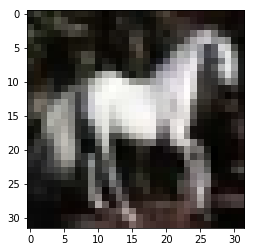

In [162]:
image_index = 13
show(x_test, y_test_cat, y_test_pred, image_index)

True
0.00: airplane
0.00: automobile
0.00: bird
1.00: cat
0.00: deer
0.00: dog
0.00: frog
0.00: horse
0.00: ship
0.00: truck

 Predict
0.21: airplane
0.01: automobile
0.03: bird
0.23: cat
0.00: deer
0.06: dog
0.01: frog
0.01: horse
0.40: ship
0.03: truck


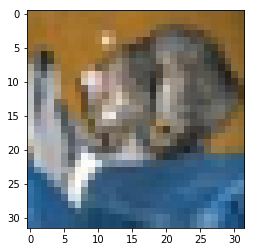

In [172]:
image_index = 0
show(x_test, y_test_cat, y_test_pred, image_index)

True
0.00: airplane
0.00: automobile
0.00: bird
0.00: cat
0.00: deer
0.00: dog
0.00: frog
0.00: horse
1.00: ship
0.00: truck

 Predict
0.28: airplane
0.02: automobile
0.00: bird
0.00: cat
0.00: deer
0.00: dog
0.00: frog
0.00: horse
0.70: ship
0.00: truck


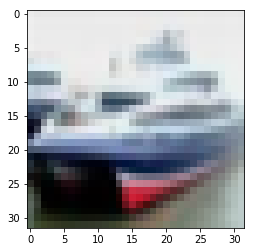

In [173]:
image_index = 1
show(x_test, y_test_cat, y_test_pred, image_index)

True
0.00: airplane
0.00: automobile
0.00: bird
0.00: cat
0.00: deer
0.00: dog
0.00: frog
0.00: horse
1.00: ship
0.00: truck

 Predict
0.11: airplane
0.03: automobile
0.00: bird
0.00: cat
0.00: deer
0.00: dog
0.00: frog
0.00: horse
0.80: ship
0.05: truck


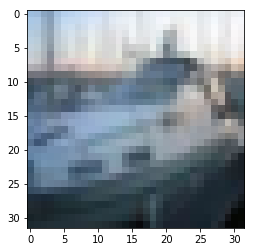

In [174]:
image_index = 2
show(x_test, y_test_cat, y_test_pred, image_index)

True
1.00: airplane
0.00: automobile
0.00: bird
0.00: cat
0.00: deer
0.00: dog
0.00: frog
0.00: horse
0.00: ship
0.00: truck

 Predict
0.92: airplane
0.00: automobile
0.00: bird
0.00: cat
0.00: deer
0.00: dog
0.00: frog
0.00: horse
0.07: ship
0.00: truck


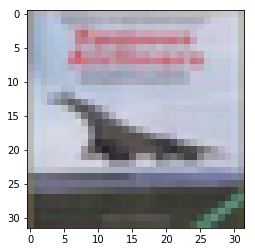

In [175]:
image_index = 3
show(x_test, y_test_cat, y_test_pred, image_index)

True
0.00: airplane
0.00: automobile
0.00: bird
0.00: cat
0.00: deer
0.00: dog
1.00: frog
0.00: horse
0.00: ship
0.00: truck

 Predict
0.00: airplane
0.00: automobile
0.05: bird
0.23: cat
0.07: deer
0.01: dog
0.62: frog
0.00: horse
0.00: ship
0.00: truck


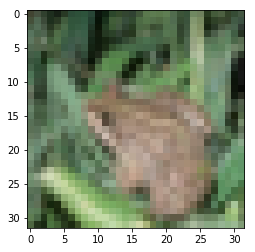

In [176]:
image_index = 4
show(x_test, y_test_cat, y_test_pred, image_index)

True
0.00: airplane
0.00: automobile
0.00: bird
0.00: cat
0.00: deer
0.00: dog
1.00: frog
0.00: horse
0.00: ship
0.00: truck

 Predict
0.01: airplane
0.01: automobile
0.04: bird
0.07: cat
0.01: deer
0.03: dog
0.82: frog
0.00: horse
0.01: ship
0.01: truck


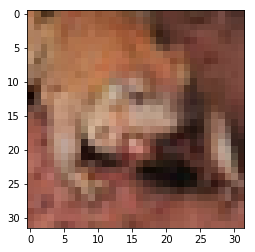

In [177]:
image_index = 5
show(x_test, y_test_cat, y_test_pred, image_index)